# **Projet P6 - révisions et pratique**

Vous allez travailler sur des données extraites de IMDB. Cela vous permettra si vous les souhaitez (plus tard!) d'inclure ce travail à votre projet TheMoviePredictor que vous faites avec Arnaud dans lequel vous récupérez justement ces données et construisez votre base. La variable d'intérêt sera la notation IMDB des films pour pouvoir déterminer. En effet le succès commercial d'un film n'implique pas nécessairement sa qualité et il convient donc d'aller chercher plus loin que le simple profit dégagé d'une production cinématographique...
À vous !!

Les **objectifs** de ce projet sont multiples :
1. Réviser
2. Pratiquer
3. Vous auto-évaluer et vous évaluer (pour nous)
4. Vous rassurer et vous permettre de réaliser ce que vous savez faire pour pouvoir en parler

## **1. Import des libraries**

**À FAIRE**

> Importer dans la cellule l'ensemble des librairies nécessaires à votre travail. L'idée n'est pas de savoir immédiatement tout ce dont vous aurez besoin mais de faire des aller-retours pour y ajouter vos librairies petit à petit. L'intérêt est une meilleure lisibilité pour un lecteur extérieur qui, en quelques lignes d'import, pourra déjà avoir une idée de ce qui a été fait.

In [207]:
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.api import OLS, add_constant

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE, RFECV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
from sklearn.svm import SVC, SVR
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score

#from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler
#from sklearn.impute import SimpleImputer
#from sklearn.compose import ColumnTransformer,make_column_selector

## **2. Import des données**

**À FAIRE**

> Importer les données `5000_movies.csv` disponible à la racine de ce document.  
> Afficher les 7 premières lignes et **toutes** les colonnes.    
> Répondre aux questions suivantes (répondez à toutes les questions dans une seule cellule Markdown mais évidemment le code vous ayant permis d'extraire ces informations doit être présent):

In [208]:
# ces options permettent d'afficher toutes les colonnes (sans les "..." au milieu)

#pd.options.display.max_columns = None
pd.set_option('display.max_columns', 100)

data = pd.read_csv("5000_movies.csv")
data.head(7)

,color,director_name,num_critic_for_reviews,duration,director_fb_likes,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_fb_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,movie_fb_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


### Combien y a-t-il d'observations/de variables ?
>- il y a 5043 lignes 28 colonnes

le code qui m'a permis d'extraire ces informations est :

    data.shape
___________________

### Sur combien d'années se répartissent les données ?
>- les données se répartissent sur 100 ans (de 1916 à 2016)

le code qui m'a permis d'extraire ces informations est :

    années = max(data.title_year) - min(data.title_year)
_______________________________

### Combien de pays sont représentés ?
>- Il y a 66 pays représentés

le code qui m'a permis d'extraire ces informations est :

    data['country'].nunique(drop=True)
______________________


### Combien de réalisateurs différents dans la base ?
>- Il y a 2339 réalisateurs représentés dans la base

le code qui m'a permis d'extraire ces informations est :

    data['director_name'].unique().shape
_________________________


### Combien d'acteurs et d'actrices différents ?
>- Il y a 6256 d'acteurs et d'actrices différents (6255 avec la 2eme methode)

le code qui m'a permis d'extraire ces informations est :

    un = data['actor_1_name'].unique()
    deux = data['actor_2_name'].unique()
    trois = data['actor_3_name'].unique()
    tous = []
    for i in un:
        tous.append(i)
    for j in deux:
        if j not in tous:
            tous.append(j)
    for k in trois:
        if k not in tous:
            tous.append(k)
    print(len(tous))
 __________________

    actors = pd.series(data[['actor_1_name','actor_2_name','actor_3_name']].values.flatten())
    actors.nunique(dropna=True)

## **3. Nettoyage des données**

**À FAIRE**

> Vous allez dans cette partie vous occuper de faire les opérations de nettoyage sur les données. Cela implique donc de regarder en détail :
>- les doublons
>- les variables (à supprimer, à modifier etc...)
>- les valeurs manquantes
>- les zéros
> 
>Ajouter une courte explication des décisions que vous prendrez (gestion des valeurs manquantes, suppression ou modification de certaines variables, etc...).

### I. Doublons

##### 1. Visualisation :

In [209]:
sum(data.duplicated())

45

##### 2. Supression  :
>- Il n'y a aucun intérêt à garder les doublons

In [210]:
data.drop_duplicates(subset=['director_name',\
                             'movie_title',\
                             'title_year'], keep="first", inplace=True)
len(data)

4919

### Variables 

##### 1. Visualisation :

In [211]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_fb_likes', 'actor_3_fb_likes', 'actor_2_name',
       'actor_1_fb_likes', 'gross', 'genres', 'actor_1_name', 'movie_title',
       'num_voted_users', 'cast_total_fb_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_fb_likes', 'imdb_score',
       'aspect_ratio', 'movie_fb_likes'],
      dtype='object')

##### 2. Supression :

On peut commencer par supprimer ses deux variables :
>- La variable `plot_keywords` : pourrait être utile mais sera compliquée à gérer.
>- (La variable `movie_imdb_link` : elle a servi pour scrapper quelques infos supplémentaires sur IMDB mais maintenant que c'est fait, plus besoin.)

In [212]:
data.drop(['plot_keywords', 'movie_imdb_link'], axis=1, inplace=True)
data.shape

(4919, 26)

### Zéros

##### 1. Visualisation :

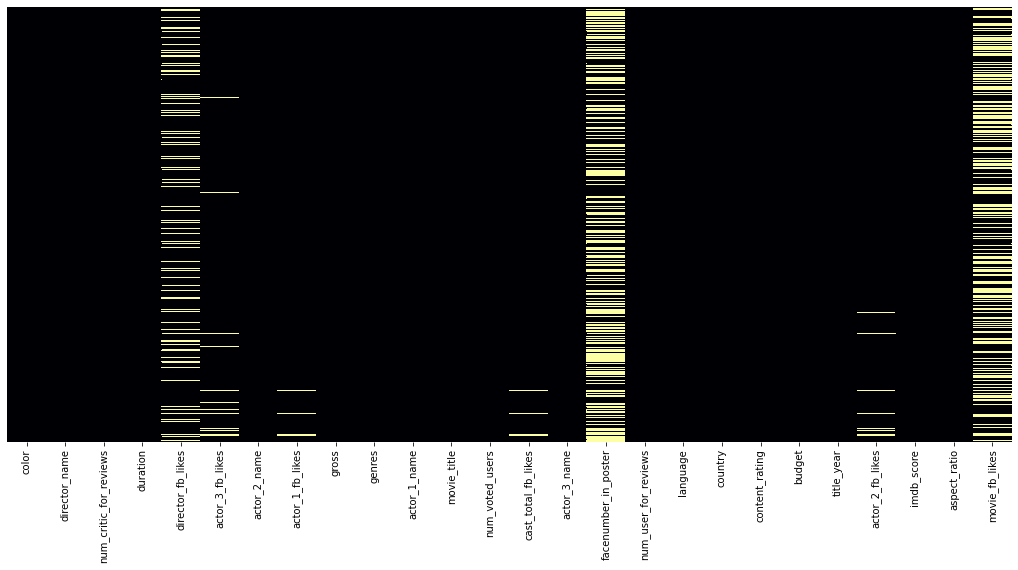

In [213]:
fig, ax = plt.subplots(figsize=(18,8))
sns.heatmap(data==0, yticklabels=False, cbar=False, cmap='inferno');

In [214]:
#sélection des variables contenant des 0 sauf facenumber_in_poster
cols = data.columns[(data==0).any()].drop('facenumber_in_poster')
cols

Index(['director_fb_likes', 'actor_3_fb_likes', 'actor_1_fb_likes',
       'cast_total_fb_likes', 'actor_2_fb_likes', 'movie_fb_likes'],
      dtype='object')

##### 2. Remplacement des 0 par des Nan
>- La plupart des zéro son des valeurs manquantes sauf pour la variable `facenumber_in_poster` 

In [215]:
data[cols] = data[cols].replace(0, np.nan)

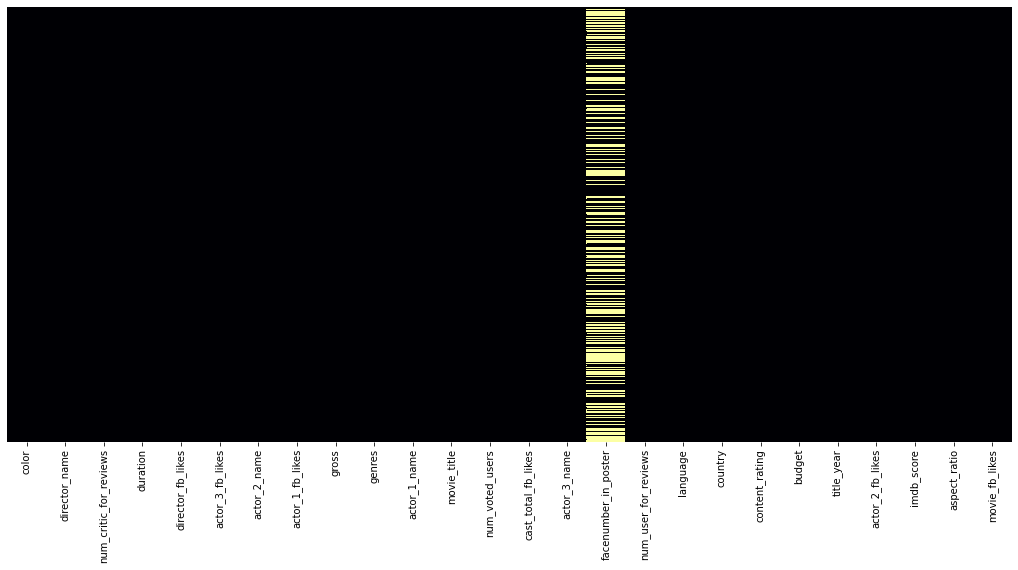

In [216]:
fig, ax = plt.subplots(figsize=(18,8))
sns.heatmap(data==0, yticklabels=False, cbar=False, cmap='inferno');

### Valeurs manquantes 

#### 1. Visualisation :

In [217]:
data.isnull().sum().sort_values(ascending=False)/len(data)

movie_fb_likes            0.433218
director_fb_likes         0.199431
gross                     0.175442
budget                    0.098597
aspect_ratio              0.066274
content_rating            0.061191
actor_3_fb_likes          0.022769
title_year                0.021549
director_name             0.020736
actor_2_fb_likes          0.013824
num_critic_for_reviews    0.009961
cast_total_fb_likes       0.006709
actor_1_fb_likes          0.006709
actor_3_name              0.004676
num_user_for_reviews      0.004269
color                     0.003863
duration                  0.003049
actor_2_name              0.002643
facenumber_in_poster      0.002643
language                  0.002440
actor_1_name              0.001423
country                   0.001016
genres                    0.000000
movie_title               0.000000
imdb_score                0.000000
num_voted_users           0.000000
dtype: float64

##### 2. Gestion des NaNs :


#### 1er et 2eme colones ayant le plus de NaNs : 
>- `director_fb_likes`
>- `movie_fb_likes`

plutot que de supprimer les lignes contenant des nans (on perdrait trop de lignes), on peut supprimer certaines variables car elles on trop de valeurs manquantes 

In [218]:
data.drop(['movie_fb_likes','director_fb_likes'], axis=1, inplace=True)
data.shape

(4919, 24)

______________

##### 3eme et 4eme colones ayant le plus de NaNs : 
>- `gross`
>- `budget`

On supprime les lignes contenant les NaNs car on a besoin de ces variable

In [219]:
data.dropna(subset=['gross', 'budget'], inplace=True)
data.shape

(3790, 24)

______________

On peut connaitre le pourcentage d'observations écartées :
> `round((4919-4213)/4919,2)`

> 0.14

On peur connaitre le nombre Nans qu'il reste :
> `4213-data.dropna().shape[0]`

> 262

______________

##### 5eme colone ayant le plus de NaNs : 
>- `aspect_ratio`

avec une rapide recherche, aspect_ration représente les dimensions de l'image (càd rapport de la largeur sur la hauteur).

On supprimera donc cette variable

explication : demander a Louis

In [220]:
''' 
data.aspect_ratio.value_counts()

# Principalement 2.35 et 1.85, on regroupe les autres valeurs sous une seule modalité et on va calculer la moyenne et la variance du score de chaque sous-groupe
print(
    'Les moyennes des 3 groupes sont :',
    data.imdb_score[data.aspect_ratio==2.35].mean(),
    data.imdb_score[data.aspect_ratio==1.85].mean(),
    data.imdb_score[(data.aspect_ratio!=2.35)&(data.aspect_ratio!=1.85)].mean()
)

print(
    'Les variances des 3 groupes sont :',
    data.imdb_score[data.aspect_ratio==2.35].std()**2,
    data.imdb_score[data.aspect_ratio==1.85].std()**2,
    data.imdb_score[(data.aspect_ratio!=2.35)&(data.aspect_ratio!=1.85)].std()**2
)
'''

" \ndata.aspect_ratio.value_counts()\n\n# Principalement 2.35 et 1.85, on regroupe les autres valeurs sous une seule modalité et on va calculer la moyenne et la variance du score de chaque sous-groupe\nprint(\n    'Les moyennes des 3 groupes sont :',\n    data.imdb_score[data.aspect_ratio==2.35].mean(),\n    data.imdb_score[data.aspect_ratio==1.85].mean(),\n    data.imdb_score[(data.aspect_ratio!=2.35)&(data.aspect_ratio!=1.85)].mean()\n)\n\nprint(\n    'Les variances des 3 groupes sont :',\n    data.imdb_score[data.aspect_ratio==2.35].std()**2,\n    data.imdb_score[data.aspect_ratio==1.85].std()**2,\n    data.imdb_score[(data.aspect_ratio!=2.35)&(data.aspect_ratio!=1.85)].std()**2\n)\n"

In [221]:
# Étant données les moyennes et variances très proches des 3 groupes, on peut supprimer cette variable de notre analyse sans que cela affecte les résultats.
data.drop('aspect_ratio', axis=1, inplace=True)
data.shape

(3790, 23)

______________

##### 6eme colone ayant le plus de NaNs :
>- `content_rating`

On supprime les lignes contenant les NaNs car on a besoin de ces variable

In [222]:
data.dropna(subset=['content_rating'], inplace=True)
data.shape

(3739, 23)

______________

### On visualise à nouveau les NaNs après ses modifications

In [223]:
data.isnull().sum().sort_values(ascending=False)

actor_3_fb_likes          36
actor_2_fb_likes          18
facenumber_in_poster       6
actor_3_name               6
cast_total_fb_likes        5
actor_1_fb_likes           5
color                      2
language                   2
actor_2_name               2
num_critic_for_reviews     1
actor_1_name               1
gross                      0
director_name              0
duration                   0
imdb_score                 0
genres                     0
movie_title                0
num_user_for_reviews       0
country                    0
content_rating             0
budget                     0
title_year                 0
num_voted_users            0
dtype: int64

______________

##### On observe maintenant la colone : 
>- `facenumber_in_poster`

    data[data.facenumber_in_poster.isna()]
    
il y en a que 9, exceptionnellement on peut aller voir les affiches des films et les remplire "à la main" ça va aller vite

In [224]:
data.loc[99,'facenumber_in_poster'] = 1 #hobbit
data.loc[248,'facenumber_in_poster'] = 8 #tortues ninja
data.loc[1948,'facenumber_in_poster'] = 2 #dear john
data.loc[3016,'facenumber_in_poster'] = 2 #heaven
data.loc[3373,'facenumber_in_poster'] = 0 #kicks
data.loc[3797,'facenumber_in_poster'] = 0 #the visit
data.loc[3853,'facenumber_in_poster'] = 6 #mom's night out
data.loc[4444,'facenumber_in_poster'] = 4 #Growing Up Smith
data.loc[4692,'facenumber_in_poster'] = 4 #The Sisterhood of Night

______________

##### On observe maintenant la colone :
>- `Color`

    data[data.color.isna()]

les 3 valeurs manquantes correspondent à des films récents et en couleur


In [225]:
data.loc[data.color.isna(), 'color'] = 'Color'

______________

##### On observe maintenant la colone :
>- `language`

    data[data.language.isna()]

les 3 valeurs manquantes correspondent à des films américains


In [226]:
data.loc[data.language.isna(), 'language'] = 'English'

______________

##### On observe maintenant les colones :
>- `cast_total_fb_likes`
>- `actor_1_fb_likes`
>- `actor_2_fb_likes`
>- `actor_3_fb_likes`
>- `imdb_score`

    data[['cast_total_fb_likes', 'actor_1_fb_likes', 'actor_2_fb_likes', 'actor_3_fb_likes', 'imdb_score']].corr()
    
`cast_total_fb_likes` et `actor_1_fb_likes` sont très corrélées. 

Pour les 2 autres variables `actor_2_fb_likes` et `actor_3_fb_likes` on peut choisir de les supprimer pour les remplacer par une information `other_actors_fb_likes` = `cast_total_fb_likes` - `actor_1_fb_likes`, cela permettra de diminuer le nombre de valeurs manquantes

In [227]:
data['other_actors_fb_likes'] = data.cast_total_fb_likes - data.actor_1_fb_likes

# suppression variables redondantes
data.drop(['cast_total_fb_likes', 'actor_2_fb_likes', 'actor_3_fb_likes'], axis=1, inplace=True)
data.shape

(3742, 21)

______________

### On visualise à nouveau les NaNs après ses modifications

In [228]:
data.isnull().sum().sort_values(ascending=False)

actor_3_name              9
other_actors_fb_likes     8
actor_1_fb_likes          8
actor_2_name              5
num_critic_for_reviews    4
actor_1_name              4
movie_title               3
director_name             3
duration                  3
gross                     3
genres                    3
num_voted_users           3
imdb_score                3
num_user_for_reviews      3
country                   3
content_rating            3
budget                    3
title_year                3
facenumber_in_poster      0
language                  0
color                     0
dtype: int64

On remarque que le nombre de NaNs est plutôt pas pour le reste des colonnes.

On peut peux à présent y imputer la moyenne de nos colones :
>- `other_actors_fb_likes`
>- `actor_fb_likes`
>- `num_critic_for_reviews`
>- `num_user_for_reviews`
>- `duration`


In [229]:
data.loc[data.other_actors_fb_likes.isna(),'other_actors_fb_likes'] = data.other_actors_fb_likes.mean()
data.loc[data.actor_1_fb_likes.isna(),'actor_1_fb_likes'] = data.actor_1_fb_likes.mean()
data.loc[data.num_critic_for_reviews.isna(),'num_critic_for_reviews'] = data.num_critic_for_reviews.mean()
data.loc[data.num_user_for_reviews.isna(),'num_user_for_reviews'] = data.num_user_for_reviews.mean()
data.loc[data.duration.isna(),'duration'] = data.duration.mean()

In [230]:
# on reset l'index après toutes les suppressions de lignes
data.reset_index(drop=True, inplace=True)

_______________________

##### 3. Remplacement des données (premier data) grâce au scraping

Voir correction louis 

In [231]:
# Le code ci-dessous permet de scrapper les données sur IMDB.
# Il est un peu long à éxecuter donc je vous ai sauvegardé un nouveau fichier 5000_movies_bis.csv avec les données scrappées en plus
# On recommence le notebook avec le nouveau jeu de données
"""
from urllib.request import urlopen
from bs4 import BeautifulSoup

def scrap_gross(row):
    link = row['movie_imdb_link']
    if np.isnan(row['gross']):
        page = urlopen(link).read()
        soup = BeautifulSoup(page)
        for h4 in soup.find_all('h4', {'class':'inline'}):
            if "Cumulative Worldwide Gross:" in h4:
                return float(h4.next_sibling.strip().replace("$","").replace(",",""))
    else:
        return row['gross']
    
def scrap_budget(row):
    link = row['movie_imdb_link']
    if np.isnan(row['budget']):
        page = urlopen(link).read()
        soup = BeautifulSoup(page)
        for h4 in soup.find_all('h4', {'class':'inline'}):
            if "Budget:" in h4:
                return float(h4.next_sibling.strip().replace("$","").replace(",","").replace("EUR","")) #il faudrait convertir la valeur € en $ pour bien faire...
    else:
        return row['budget']
    
data['budget'] = data.apply(scrap_budget, axis=1)
data['gross'] = data.apply(scrap_gross, axis=1)

data.to_csv('5000_movies_bis.csv', index=False)
"""

'\nfrom urllib.request import urlopen\nfrom bs4 import BeautifulSoup\n\ndef scrap_gross(row):\n    link = row[\'movie_imdb_link\']\n    if np.isnan(row[\'gross\']):\n        page = urlopen(link).read()\n        soup = BeautifulSoup(page)\n        for h4 in soup.find_all(\'h4\', {\'class\':\'inline\'}):\n            if "Cumulative Worldwide Gross:" in h4:\n                return float(h4.next_sibling.strip().replace("$","").replace(",",""))\n    else:\n        return row[\'gross\']\n    \ndef scrap_budget(row):\n    link = row[\'movie_imdb_link\']\n    if np.isnan(row[\'budget\']):\n        page = urlopen(link).read()\n        soup = BeautifulSoup(page)\n        for h4 in soup.find_all(\'h4\', {\'class\':\'inline\'}):\n            if "Budget:" in h4:\n                return float(h4.next_sibling.strip().replace("$","").replace(",","").replace("EUR","")) #il faudrait convertir la valeur € en $ pour bien faire...\n    else:\n        return row[\'budget\']\n    \ndata[\'budget\'] = data.ap

________________________

### Modification des variables

##### affichage des valeurs pour voir s'il n'y a pas de caractères spéciaux qui se baladent.

In [232]:
data.loc[64].values

array(['Color', 'Christopher Nolan', 645.0, 152.0, 'Heath Ledger',
       23000.0, 533316061.0, 'Action|Crime|Drama|Thriller',
       'Christian Bale', 'The Dark Knight\xa0', 1676169.0,
       'Morgan Freeman', 0.0, 4667.0, 'English', 'USA', 'PG-13',
       185000000.0, 2008.0, 9.0, 34802.0], dtype=object)

>-c'est pas évident à voir mais il y a bien un \xa0 louche après les titres des films

In [233]:
data.movie_title = data.movie_title.apply(lambda row : row.replace('\xa0',''))

AttributeError: 'float' object has no attribute 'replace'

_________________

##### On va regarder plus en détail la variable `content_rating`.

In [ ]:
data.content_rating.value_counts()

Une petite recherche et on trouve que historiquement, on a plus ou moins :
- Passed = Approved = M = GP = PG
- TV-14 = PG-13
- X = NC-17
- Not Rated = Unrated = NR

On veut donc remplacer :
- Passed, Approved, M et GP par **PG**
- TV-14 par **PG-13**
- X par **NC-17**
- Not Rated et Unrated par **UR** qui sont les notations utilisées aujourd'hui.

In [ ]:
def replace_rating(row):
    if row['content_rating'] in ['Passed', 'Approved', 'M', 'GP']:
        return 'PG'
    elif row['content_rating'] in ['Not Rated', 'Unrated']:
        return 'UR'
    elif row['content_rating'] == 'X':
        return 'NC-17'
    elif row['content_rating'] == 'TV-14':
        return 'PG-13'
    else:
        return row['content_rating']
    
data['content_rating'] = data.apply(replace_rating, axis=1)
data.content_rating.value_counts()

_______________________

#### le dernier point en suspens est la variable `genres` qu'il faut spliter puis créer des OneHotEncoded variables (un seul codage à chaud = des dummies)

In [ ]:
genre_dummies = data.genres.str.get_dummies('|')
data = pd.concat([data,genre_dummies], axis=1)
data.drop(['genres'], axis=1, inplace=True)
data

____________________

#### On s'interesse maintenant à les variables `language` et `country` où il faut remplacer les variables

In [ ]:
def replace_language(row):
    if row['language'] in ['French', 'Spanish', 'German', 'Italian', 'Portuguese', 'Norwegian', 'Dutch',
                           'Danish', 'Romanian', 'Bosnian', 'Czech', 'Hungarian', 'Swedish']:
        return 'European'
    elif row['language'] == 'English':
        return 'English'
    else:
        return 'Other languages'
    
data['language'] = data.apply(replace_language, axis=1)
data.language.value_counts()

In [ ]:
def replace_country(row):
    if row['country'] in ['UK', 'France', 'Spain', 'Germany', 'West Germany', 'Italy', 'Portugal', 'Norway', 'Netherlands',
                        'Denmark', 'Ireland', 'Romania', 'Iceland', 'Czech', 'Hungary', 'Sweden', 'Belgium', 'Greece',
                        'Bulgaria', 'Switzerland', 'Poland', 'Finland']:
        return 'Europe'
    elif row['country'] in ['USA','Canada']:
        return 'North America'
    else:
        return 'Other countries'
    
data['country'] = data.apply(replace_country, axis=1)
data.country.value_counts()

## **4. Analyse exploratoire**

**À FAIRE**

>Dans cette partie, vous devez "explorer" vos données et les visualiser. Cette tâche, qui peut s'avérer très vaste, consiste à s'intéresser à l'information contenue dans nos données "au premier abord".
>
>Sont donc attendus dans cette partie :
>- quelques statistiques descriptives
>- entre 6 et 10 visualisations (vous pouvez bien sûr en regrouper plusieurs sur une même figure)
>- et pour chaque résultat/graphique présenté, une explication succinte

In [ ]:
data.describe()

### Historique des sorties de films

In [ ]:
data.hist('title_year', bins=45);

_________________

### Les moyennes par genre

In [ ]:
mean_genre = {}
for gen in data.columns[-21:]:
    mean_genre[gen] = data.loc[data[gen]==1,'imdb_score'].mean()
    
plt.bar(mean_genre.keys(), mean_genre.values())
plt.xticks(rotation=90);

________________________________

### Top 20 des films ayant généré le plus de profit

In [ ]:
data['profit'] = data.gross - data.budget
top20profit = data[['movie_title', 'profit', 'budget']].sort_values('profit', ascending=False).iloc[:20].reset_index(drop=True)
top20profit

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(23,20))
top20profit.plot('budget', 'profit', kind='scatter', ax=ax, s=100, linewidth=0, c=range(20), colormap="plasma", colorbar=False);

for k in range(20):
    ax.annotate(top20profit.loc[k,'movie_title'], top20profit.loc[k,['budget','profit']],
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=13, color='darkslategrey')

_____________________

### Retour sur investissement du top20 des profits

In [ ]:
top20profit['roi'] = top20profit.profit/top20profit.budget*100
top20profit = top20profit.sort_values('roi', ascending=False).reset_index(drop=True)

fig, ax = plt.subplots(1,1,figsize=(15,12))
top20profit.plot('budget', 'roi', kind='scatter', ax=ax, s=100, linewidth=0, c=range(20), colormap="plasma", colorbar=False);
for k in range(20):
    ax.annotate(top20profit.loc[k,'movie_title'], top20profit.loc[k,['budget','roi']],
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=13, color='darkslategrey')

__________________

### Top 10 des films ayant les meilleurs retour sur investissement

In [ ]:
data['roi'] = data.profit/data.budget*100
top10roi = data[['movie_title', 'roi', 'budget']].sort_values('roi', ascending=False).iloc[:10].reset_index(drop=True)

fig, ax = plt.subplots(1,1,figsize=(15,12))
top10roi.plot('budget', 'roi', kind='scatter', ax=ax, s=100, linewidth=0, c=range(10), colormap="plasma", colorbar=False);
for k in range(10):
    ax.annotate(top10roi.loc[k,'movie_title'], top10roi.loc[k,['budget','roi']],
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=13, color='darkslategrey')

______________________

### Top 20 des réalisateurs ayant les meilleurs notes IMDB et leur nombre de films dans la base

In [ ]:
directors = data[['director_name', 'imdb_score', 'movie_title']].groupby('director_name').agg({'imdb_score':'mean', 'movie_title':'count'})
top20real = directors.sort_values('imdb_score', ascending=False).iloc[:20]
top20real

___________________

## **5. Pré-traitement**

**À FAIRE**

>Maintenant que vous commencez à bien connaître votre base de données, on va la préparer pour la partie modélisation.
>
>Sont donc attendus dans cette partie :
>- restriction aux données utiles à la prédiction : potentiellement certaines variables conservées pour la visualisation sont à supprimer pour la modélisation
>- création des échantillons d'entraînement et de test
>- gestion des variables catégoriques d'un côté et numériques de l'autre
>
>La standardisation n'étant pas toujours nécessaire puisque ça dépend des modèles, vous pouvez choisir de la faire dès maintenant ou bien d'attendre de voir si vous en avez besoin...

### Matrice X

>- Étant donné que tous les noms sont si différents pour l'ensemble de données entier, il est inutile d'utiliser des noms pour prédire le score. On supprime donc ses variable



In [202]:
X = data.drop('imdb_score','actor_2_name','acteur_1_name','' axis=1)
X.head()

,color,director_name,num_critic_for_reviews,duration,actor_2_name,actor_1_fb_likes,gross,actor_1_name,movie_title,num_voted_users,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,other_actors_fb_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,profit,roi
0,Color,James Cameron,723.0,178.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,Wes Studi,0.0,3054.0,English,North America,PG-13,237000000.0,2009.0,3834.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,523505847.0,220.888543
1,Color,Gore Verbinski,302.0,169.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,Jack Davenport,0.0,1238.0,English,North America,PG-13,300000000.0,2007.0,8350.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9404152.0,3.134717
2,Color,Sam Mendes,602.0,148.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,Spectre,275868,Stephanie Sigman,1.0,994.0,English,Europe,PG-13,245000000.0,2015.0,700.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-44925825.0,-18.337071
3,Color,Christopher Nolan,813.0,164.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,Joseph Gordon-Levitt,0.0,2701.0,English,North America,PG-13,250000000.0,2012.0,79759.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,198130642.0,79.252257
4,Color,Andrew Stanton,462.0,132.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,Polly Walker,1.0,738.0,English,North America,PG-13,263700000.0,2012.0,1233.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-190641321.0,-72.294775


__________________________

### Vecteur y

In [203]:
y = data['imdb_score']
y.head()

0    7.9
1    7.1
2    6.8
3    8.5
4    6.6
Name: imdb_score, dtype: float64

__________________________

### Gestion des variables catégoriques

In [205]:
data.color.value_counts()

Color               3957
 Black and White     144
Name: color, dtype: int64

In [206]:
dummy = pd.get_dummies(X['color'])
X = pd.concat([X,dummy], axis=1)
X.drop(['color',' Black and White'], axis=1, inplace=True)

dummy = pd.get_dummies(X['language'])
X = pd.concat([X,dummy], axis=1)
X.drop(['language','English'], axis=1, inplace=True)

dummy = pd.get_dummies(X['country'])
X = pd.concat([X,dummy], axis=1)
X.drop(['country','North America'], axis=1, inplace=True)

dummy = pd.get_dummies(X['content_rating'])
X = pd.concat([X,dummy], axis=1)
X.drop(['content_rating','R'], axis=1, inplace=True)

X.head()

,director_name,num_critic_for_reviews,duration,actor_2_name,actor_1_fb_likes,gross,actor_1_name,movie_title,num_voted_users,actor_3_name,facenumber_in_poster,num_user_for_reviews,budget,title_year,other_actors_fb_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,profit,roi,Color,European,Other languages,Europe,Other countries,G,NC-17,PG,PG-13,UR
0,James Cameron,723.0,178.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,Wes Studi,0.0,3054.0,237000000.0,2009.0,3834.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,523505847.0,220.888543,1,0,0,0,0,0,0,0,1,0
1,Gore Verbinski,302.0,169.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,Jack Davenport,0.0,1238.0,300000000.0,2007.0,8350.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9404152.0,3.134717,1,0,0,0,0,0,0,0,1,0
2,Sam Mendes,602.0,148.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,Spectre,275868,Stephanie Sigman,1.0,994.0,245000000.0,2015.0,700.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-44925825.0,-18.337071,1,0,0,1,0,0,0,0,1,0
3,Christopher Nolan,813.0,164.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,Joseph Gordon-Levitt,0.0,2701.0,250000000.0,2012.0,79759.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,198130642.0,79.252257,1,0,0,0,0,0,0,0,1,0
4,Andrew Stanton,462.0,132.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,Polly Walker,1.0,738.0,263700000.0,2012.0,1233.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-190641321.0,-72.294775,1,0,0,0,0,0,0,0,1,0


_______________________________________

## **6. Une régression linéaire**

**À FAIRE**

>Tout est dans le titre. Vous devez ici entraîner et tester une régression linéaire pour la prédiction de la note IMDB.  
>Par ailleurs, sont attendus ici :
>- un affichage et une interprétation des coefficients et de leur significativité
>- le choix d'une mesure d'évaluation du modèle et son interprétation
>- une validation croisée pour l'estimation de la qualité du modèle
>- *facultatif : l'ajout d'une régularisation Ridge ou Lasso pour déterminer si les résultats sont meilleurs*

## **7. Un autre modèle de régression**

**À FAIRE**

>Tout est encore dans le titre. Mettez en place le modèle **de régression** que vous souhaitez.  
>Sont donc attendus dans cette partie :
>- une petite phrase pour justifier votre choix
>- les pré-traitements supplémentaires nécessaires s'il y en a
>- évaluation du modèle avec `cross_val_score`
>- affinage des éventuels hyperparamètres avec `GridSearchCV`

## **8. De la régression à la classification**

**À FAIRE**

>Transformez le problème de régression en un problème de classification par une discrétisation du score IMDB en 5 classes : nul, bof, sympa, bon, super.  
>Justifiez votre découpage en indiquant quels seuils vous avez utilisé et pourquoi.

## **9. Une régression logistique**

**À FAIRE**

>Vous devez ici entraîner et tester une régression logistique pour la prédiction de la classe du film.  
>Par ailleurs, sont attendus ici :
>- un affichage et une interprétation des *Odds-ratio* et de leur significativité
>- le choix d'une ou plusieurs mesures d'évaluation du modèle et leur interprétation
>- une validation croisée pour l'évaluation modèle
>- l'affinage des hyperparamètres avec l'outil qui va bien
>- peut-on tracer les courbes ROC et calculer l'AUC ? Pourquoi ?

## **10. Un autre modèle de classification**

**À FAIRE**

>Au choix, une autre méthode de classification. Évidemment, sentez-vous libre d'en essayer plus d'une et de les comparer.  
>Sont donc attendus dans cette partie :
>- une petite phrase pour justifier votre choix
>- les pré-traitements supplémentaires nécessaires s'il y en a
>- évaluation du modèle
>- étude de l'importance des paramètres, si votre modèle le permet
>- affinage des éventuels hyperparamètres

## **11. En option**

Bravo, si vous êtes arrivés jusqu'ici !!!

Pour les flèches, hésitez pas à continuer si vous en voulez encore et pour les autres, hésitez pas à y revenir à l'occasion.

### **11.1. Un outil de recommandation**

**À FAIRE**

>Question un peu plus ouverte pour terminer: en utilisant une méthode de clustering (donc d'apprentissage non-supervisé), construisez un petit outil de recommandation de films.  
>Pour un film donné, votre méthode doit donc retourner les films qui lui ressemblent le plus.  
>Pour rappel, on avait fait un petit exercice comme celui-cilorsqu'on avait vu les *k-plus proches voisins*, donc vous êtes invités à ne pas utiliser kNN, sinon c'est pas drôle...  
>Vous pourrez bientôt aller plus loin en créant une petite application web permettant une interface pour choisir un film.

### **11.2. Sauvegarder un modèle**

**À FAIRE**

>Utilisez le module `pickle` pour sauvegarder le meilleur de vos modèles et le recharger ensuite.

### **11.3. Analyse en Composantes Principales**

**À FAIRE**

>Utilisez une ACP pour visualiser vos données en dimension 2 ou 3 avec des points dont la couleur varie en fonction de la classe.  